In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [14]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,Partition,ValueType
0,1.0,500000,1000000,0.722832,1000,500000,22.137617,1.383601,416,8
1,2.0,500000,1000000,1.085856,1000,1000000,23.946085,1.842007,416,8
2,3.0,500000,1000000,0.665173,1000,1500000,54.121225,4.510102,416,8
3,4.0,500000,1000000,0.833406,1000,2000000,55.195856,4.799639,416,8
4,5.0,500000,1000000,1.287129,1000,2500000,45.787904,4.088206,416,8
5,6.0,500000,1000000,1.601033,1000,3000000,44.573918,4.052174,416,8
6,7.0,500000,1000000,1.955118,1000,3500000,38.873752,3.580477,416,8
7,8.0,500000,1000000,2.434420,1000,4000000,35.326691,3.286204,416,8
8,9.0,500000,1000000,2.257053,1000,4500000,42.533348,3.987501,416,8
9,10.0,500000,1000000,2.884512,1000,5000000,36.747987,3.466791,416,8


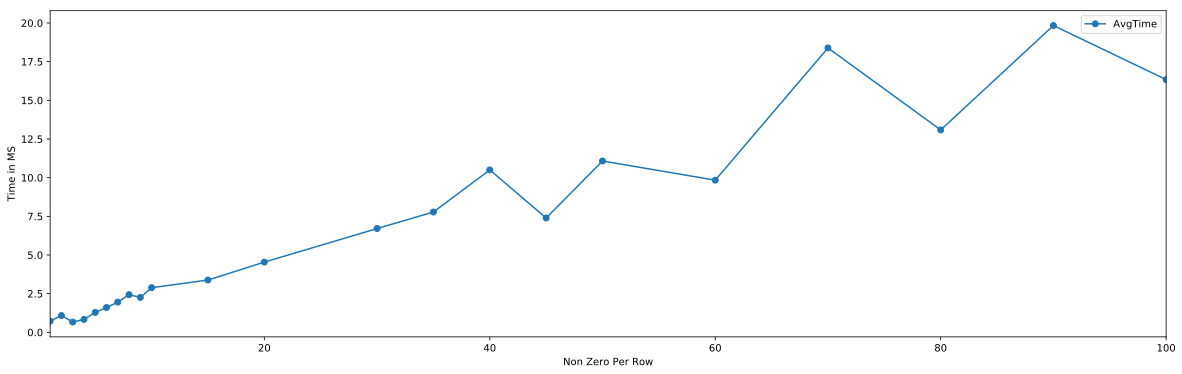

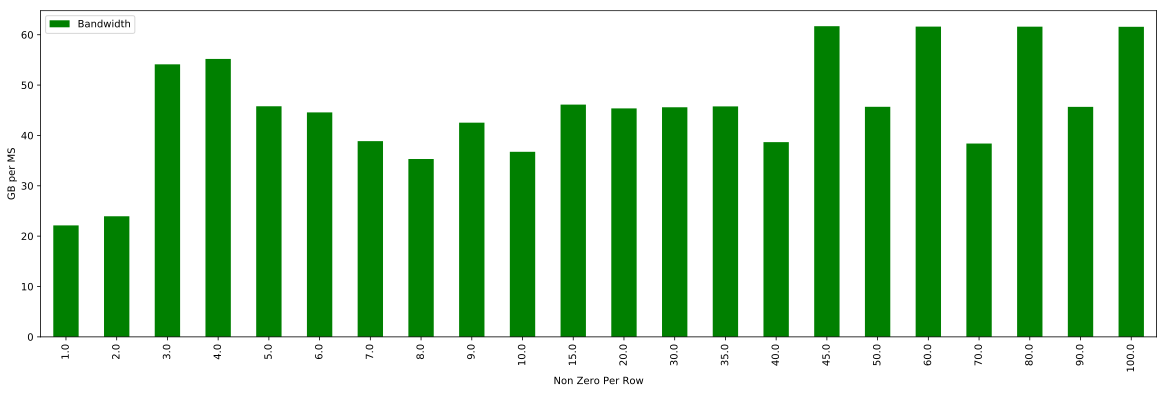

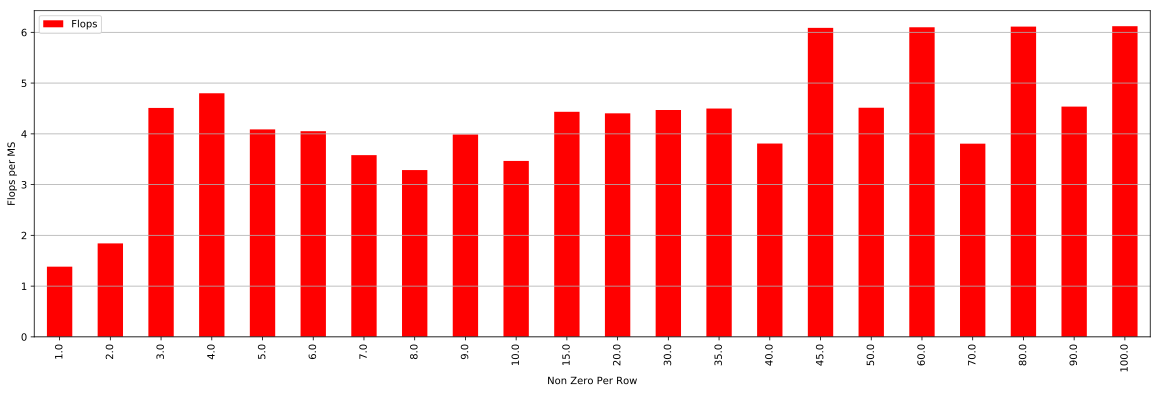

In [54]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR5_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("CSR5_cuda/CSR5_SpMV_on_GPU.csv")

data = data[data["ValueType"] == 8]
data = data[data["Partition"] == 416]
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in MS")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')


f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GB per MS")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("Flops per MS")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

pdf.close()
data

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,1.0,500000,1000000,0.341218,200,500000,52.533815,3.283363,8
1,2.0,500000,1000000,0.473758,200,1000000,59.670827,4.590063,8
2,3.0,500000,1000000,0.628742,200,1500000,60.026474,5.002206,8
3,4.0,500000,1000000,0.693167,200,2000000,66.461730,5.779281,8
4,5.0,500000,1000000,1.279796,200,2500000,45.665548,4.077281,8
5,6.0,500000,1000000,1.127970,200,3000000,58.566502,5.324227,8
6,7.0,500000,1000000,2.017571,200,3500000,37.853240,3.486482,8
7,8.0,500000,1000000,2.175415,200,4000000,39.791010,3.701489,8
8,9.0,500000,1000000,1.963997,200,4500000,49.890496,4.677234,8
9,10.0,500000,1000000,1.936230,200,5000000,54.792195,5.169075,8


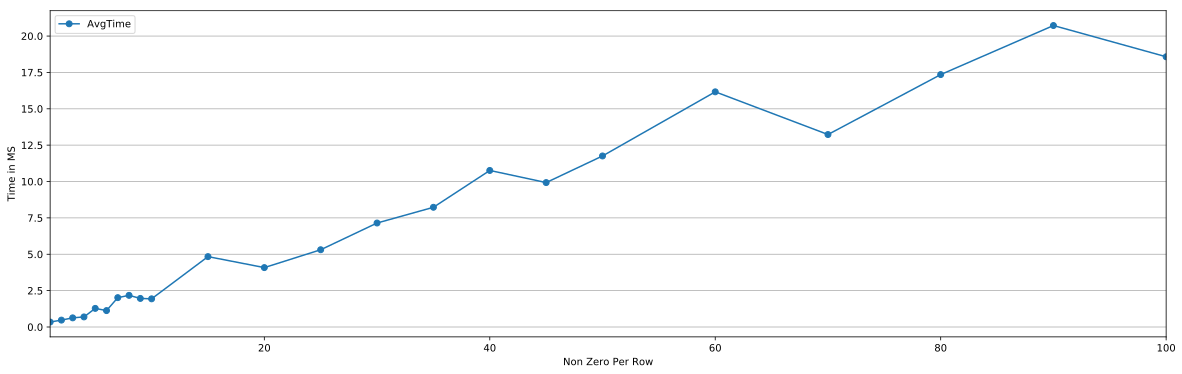

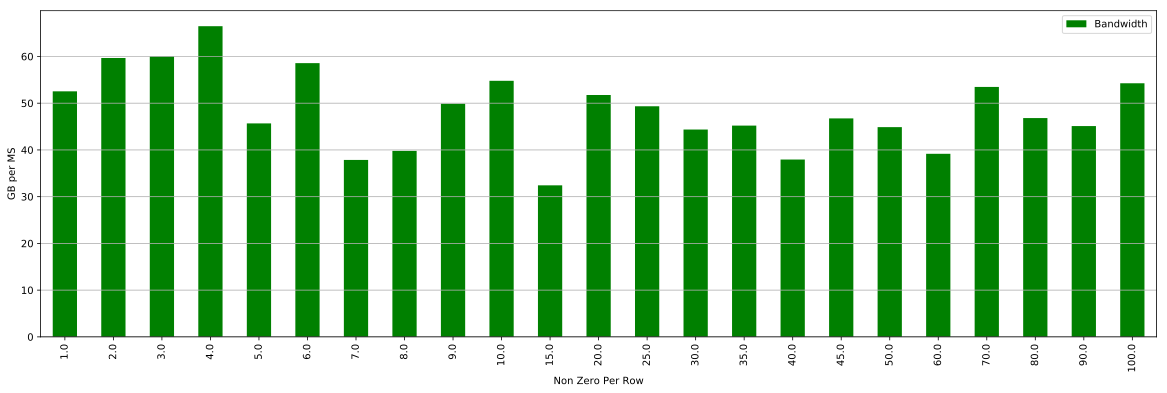

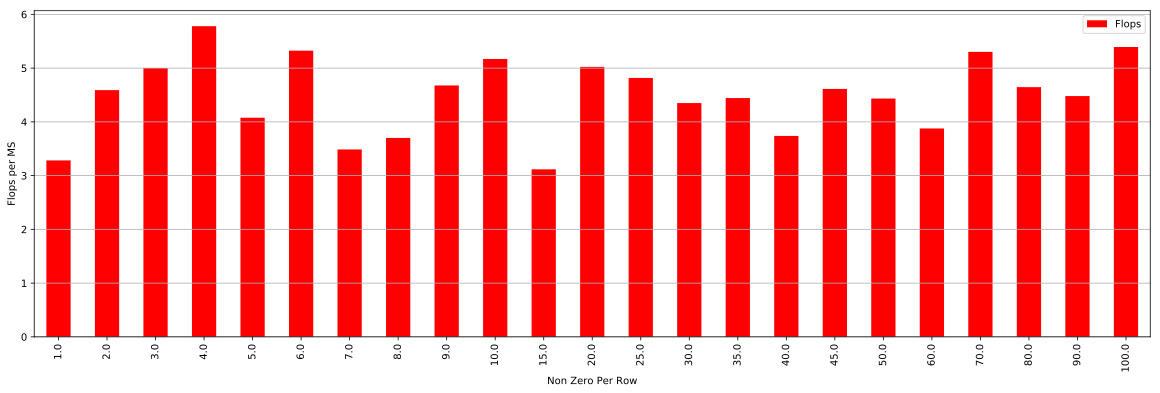

In [55]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_CUDA_SpMV_500KR_1MC.pdf")
data = pd.read_csv("../Benchmark_SpMV_using_CSR/spmv_cuda/CSR_MPI_CUDA_SpMV.csv")

# data = data[data["ValueType"] == 8]
# data = data[data["Partition"] == 416]
# Real Data
rdata = data[data["M"] != 500000]
rdata = rdata[rdata["N"] != 1000000]
rdata = rdata.groupby('NonZeroPerRow').mean()
rdata = rdata.reset_index() 
rdata = rdata.sort_values(by=["NonZeroElements"])
rdata = rdata.reset_index(drop=True) 
# Synthesis Data
data = data[data["M"] == 500000]
data = data[data["N"] == 1000000]
data = data.groupby('NonZeroPerRow').mean()
data = data.reset_index() 
data = data.sort_values(by=["NonZeroElements"])
data = data.reset_index(drop=True) 
f = plt.figure()
ax = data.plot(kind="line", marker='o', x="NonZeroPerRow", y="AvgTime", figsize=(20,6))
ax.set_ylabel("Time in MS")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Bandwidth", color='g', figsize=(20,6))
ax.set_ylabel("GB per MS")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')

f = plt.figure()
ax = data.plot(kind="bar", x="NonZeroPerRow", y="Flops", color='r', figsize=(20,6))
ax.set_ylabel("Flops per MS")
ax.set_xlabel("Non Zero Per Row")
ax.yaxis.grid()
pdf.savefig(bbox_inches = 'tight')
# ax.scatter(rdata[['NonZeroPerRow']], rdata[["AvgTime"]])
pdf.close()
data

In [37]:
rdata

,NonZeroPerRow,M,N,AvgTime,TotalRun,NonZeroElements,Bandwidth,Flops,ValueType
0,3.835031,80209,80209,0.959005,200,307604,7.418814,0.641514,8
1,7.986301,74752,74752,0.155303,200,596992,82.657381,7.688136,8
2,3.809862,1447360,1447360,1.094176,200,5514242,116.692601,10.081556,8
